In [ ]:
##İngiltere Primier lig(EPL) 2020-2021 sezonu takım futbolcuların elde edilen bilgileri ile oluşturulmuş verisetidir

#Datasetin kısa bilgisi
*   Name            = Oyuncunun İsmi
*   Club            = Oyuncunun oynadığı takım
*   Nationality     = Oyuncunun uyruğu
*   Position        = Oyuncunun oynadığı pozisyonlar
*   Age             = Oyuncunun yaşı
*   Matches         = 2020-2021 Oyuncunun oynadığı maç sayısı
*   Starts          = 2020-2021 sezonunda ilk 11 maca başlama sıyısı
*   Mins            = 2020-2021 sezonunda toplam oynadığı dakika
*   Goals           = 2020-2021 sezonunda oyuncunun atığı gol sayısı 
*   Assists         = 2020-2021 sezonunda oyuncunun yaptığı asist sayısı 
* Passes_Attempted  = 2020-2021 sezonunda oyuncunun denediği pas sayısı
* Perc_Passes_Comp  = Oyuncunun başarılı pas sayısı
* Penalty_Goals     = Oyuncunun Başarılı kullandığı penaltı sayısı
* Penalty_Attempted = Oyuncunun toplam kullandığı penaltı sayısı
*   xG              = Bir maçta oyuncudan beklenen gol sayısı
*   xA              = Bir maçta oyuncudan beklenen assist sayısı 
*   Yellow Cards    = 2020-2021 sezonunda oyuncunun aldığı sarı kart
*   Red Cards       = 2020-2021 sezonunda oyuncunun aldığı kırmızı kart

18 adet değişkenden oluşmaktadır.











#Kütüphaneler ve dataset import

In [10]:
## İmport Libary
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import pylab
from scipy.stats import shapiro
from statsmodels.stats.descriptivestats import sign_test
from sklearn.utils import shuffle

In [3]:
## Dataset Loading ve df değişkenine atama
df = pd.read_csv('/content/EPL_20_21.csv')
dfo=pd.read_csv('/content/epl2020.csv')#ikili örneklem T testi için kullanılıyor

#Datset hakkında kısa bilgiler

In [18]:
## dataset head ilk beş veri
#df.head(10)
ds = shuffle(df)# rasgele örneklem gösterimi
print(ds)

                   Name                     Club Nationality Position  Age  \
215       Illan Meslier             Leeds United         FRA       GK   20   
192       Thomas Partey                  Arsenal         GHA       MF   27   
70    Donny van de Beek        Manchester United         NED    MF,FW   23   
18   Callum Hudson-Odoi                  Chelsea         ENG    FW,DF   19   
60           Paul Pogba        Manchester United         FRA    MF,FW   27   
..                  ...                      ...         ...      ...  ...   
383      Fraser Forster              Southampton         ENG       GK   32   
254      Anthony Gordon                  Everton         ENG    FW,MF   19   
136     Aaron Cresswell          West Ham United         ENG       DF   30   
331     Fernando Marçal  Wolverhampton Wanderers         BRA       DF   31   
133          Wes Morgan           Leicester City         JAM       DF   36   

     Matches  Starts  Mins  Goals  Assists  Passes_Attempted  \

In [21]:
## Datset son 5 
df.tail()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
527,Lys Mousset,Sheffield United,FRA,"FW,MF",24,11,2,296,0,0,50,80.0,0,0,0.22,0.1,0,0
528,Jack O'Connell,Sheffield United,ENG,DF,26,2,2,180,0,0,77,77.9,0,0,0.00,0.0,0,0
529,Iliman Ndiaye,Sheffield United,FRA,MF,21,1,0,12,0,0,3,100.0,0,0,0.00,0.0,0,0
530,Antwoine Hackford,Sheffield United,ENG,"DF,FW",16,1,0,11,0,0,1,100.0,0,0,1.16,0.0,0,0
531,Femi Seriki,Sheffield United,ENG,DF,17,1,0,1,0,0,0,-1.0,0,0,0.00,0.0,0,0


In [ ]:
## dataset info bilgisi n/a değeri yok , 532 adet değer var, 4 adet object değişken veriyor,
## 11 adet kesikli(int), 3 adet sürekli(float) değişken bulunuyor ,  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   532 non-null    object 
 1   Club                   532 non-null    object 
 2   Nationality            532 non-null    object 
 3   Position               532 non-null    object 
 4   Age                    532 non-null    int64  
 5   Matches                532 non-null    int64  
 6   Starts                 532 non-null    int64  
 7   Mins                   532 non-null    int64  
 8   Goals                  532 non-null    int64  
 9   Assists                532 non-null    int64  
 10  Passes_Attempted       532 non-null    int64  
 11  Perc_Passes_Completed  532 non-null    float64
 12  Penalty_Goals          532 non-null    int64  
 13  Penalty_Attempted      532 non-null    int64  
 14  xG                     532 non-null    float64
 15  xA    

In [19]:
## Datasetin boyutu
print(df.ndim)
df.shape

2


(532, 18)

In [20]:
## sütünların isimlerin gösterilmesi
df.columns

Index(['Name', 'Club', 'Nationality', 'Position', 'Age', 'Matches', 'Starts',
       'Mins', 'Goals', 'Assists', 'Passes_Attempted', 'Perc_Passes_Completed',
       'Penalty_Goals', 'Penalty_Attempted', 'xG', 'xA', 'Yellow_Cards',
       'Red_Cards'],
      dtype='object')

In [22]:
## describe alınması ve (Transform) tersini alınarak görüntüsü açıklayıcı hale getiriliyor, katogorik değişkenleri Nan atıyor sürekli değişkenlerin değerlerini gösteriyor
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,532,524,Joe Willock,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Club,532,20,West Bromwich Albion,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Nationality,532,59,ENG,192,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Position,532,10,DF,178,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,532.0,NaN,NaN,NaN,25.5,4.319404,16.0,22.0,26.0,29.0,38.0
Matches,532.0,NaN,NaN,NaN,19.535714,11.840459,1.0,9.0,21.0,30.0,38.0
Starts,532.0,NaN,NaN,NaN,15.714286,11.921161,0.0,4.0,15.0,27.0,38.0
Mins,532.0,NaN,NaN,NaN,1411.443609,1043.171856,1.0,426.0,1345.0,2303.5,3420.0
Goals,532.0,NaN,NaN,NaN,1.853383,3.338009,0.0,0.0,1.0,2.0,23.0
Assists,532.0,NaN,NaN,NaN,1.287594,2.095191,0.0,0.0,0.0,2.0,14.0


In [23]:
#Eksik değer bulunmuyor / değer olmadığı için isnull işlemleri yapılmadı
df.isnull().values.any()

False

#Katagorik değişkenlerin özeti ve Barhcart gösterimi

In [24]:
## İlk 5 katagorik değişkenlerin özeti  ve değişkenleri kat_df değişkene atanması
kat_df =  df.select_dtypes(include=['object'])
kat_df.head()

,Name,Club,Nationality,Position
0,Mason Mount,Chelsea,ENG,"MF,FW"
1,Edouard Mendy,Chelsea,SEN,GK
2,Timo Werner,Chelsea,GER,FW
3,Ben Chilwell,Chelsea,ENG,DF
4,Reece James,Chelsea,ENG,DF


In [26]:
#Name , Club ve Nationality  Katogorik değişkenlerin adetleri 
print(f"20-21 sezonunda Epl'de  toplam  {kat_df['Name'].value_counts().count()} adet Oyuncu bulunuyor")
print(f"20-21 sezonunda Epl'de  toplam   {kat_df['Club'].value_counts().count()} adet Klup bulunuyor ")
print(f"20-21 sezonunda Epl'de  toplam  {kat_df['Nationality'].value_counts().count()} adet değişik Ulustan oyuncu bulunuyor")

20-21 sezonunda Epl'de  toplam  524 adet Oyuncu bulunuyor
20-21 sezonunda Epl'de  toplam   20 adet Klup bulunuyor 
20-21 sezonunda Epl'de  toplam  59 adet değişik Ulustan oyuncu bulunuyor


In [27]:
#Name değişkenin içeriği 
kat_df['Name'].value_counts()

Joe Willock           2
Ruben Loftus-Cheek    2
Takumi Minamino       2
Robert Snodgrass      2
Theo Walcott          2
                     ..
Lucas Moura           1
Moussa Sissoko        1
Davinson Sánchez      1
Serge Aurier          1
Femi Seriki           1
Name: Name, Length: 524, dtype: int64

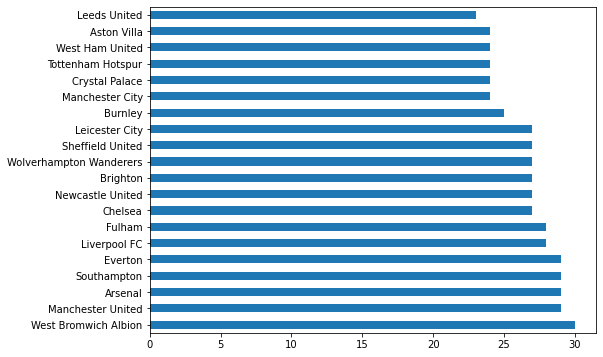

In [33]:
# barchart grafiği ile Club değişkenin içerisindeki takımların benzersiz yani tekil olan adetlerini gösteriyor 
kat_df['Club'].value_counts().plot(kind='barh',figsize=(8, 6)) 

#Pasta Graifik gösterimi

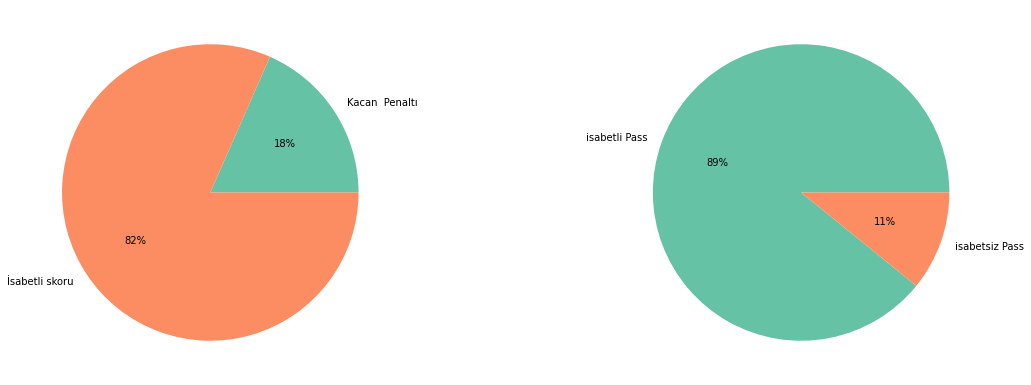

In [118]:
#Peanatly ve Pass oranlarının Pasta grafiği gösterimi
plt.figure(figsize=(30, 15))
pn_goals=df.Penalty_Goals.sum()
pas_comp=df.Perc_Passes_Completed.sum()
#Penaltı Oran belirleme
penalty_rate=df['Penalty_Attempted'].sum() - pn_goals
pie_data = [penalty_rate,pn_goals]
pie_label = ['Kacan  Penaltı', 'İsabetli skoru']
color=sns.color_palette("Set2")
#Pass oranı belirleme
pass_rate = df['Passes_Attempted'].sum()- pas_comp
pass_pie_data=[pass_rate,pas_comp]
pass_pie_label=['isabetli Pass','isabetsiz Pass']
#plot ile iki şekilde cizdirme
plt.subplot(231),plt.pie(pie_data, labels=pie_label,colors=color, autopct='%.0f%%')
plt.subplot(232),plt.pie(pass_pie_data, labels=pass_pie_label,colors=color, autopct='%.0f%%')
plt.show()

# Kesikli ve Sürekli değişkenlerin Özeti

In [34]:
 # Kesikli ve sürekli kat_num atanması ve özetini cıkarmak görüldüğü üzere string değerler yoktur
df_num =  df.select_dtypes(include=['float64',"int64"])
df_num.head()

,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


In [35]:
#sadece goals değişkenin istatiksel değerlerinin gösterimi
df_num['Goals'].describe().T

count    532.000000
mean       1.853383
std        3.338009
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max       23.000000
Name: Goals, dtype: float64

In [36]:
#Numeric bazı değişkenlerin ortalamasının gösterimi
print('EPL liginin 20-21 sezon Gol ortalaması =  ' + str(df_num['Goals'].mean()))
print('EPL liginin 20-21 sezon Penaltı Gol ortalaması = ' + str(df_num['Penalty_Goals'].mean()))
print('EPL liginin 20-21 sezon oyuncuların Yaş ortalaması = ' + str(df_num['Age'].mean()))

EPL liginin 20-21 sezon Gol ortalaması =  1.8533834586466165
EPL liginin 20-21 sezon Penaltı Gol ortalaması = 0.19172932330827067
EPL liginin 20-21 sezon oyuncuların Yaş ortalaması = 25.5


#Kategorik değişkenlerin görselleştirilmesi

In [ ]:
# Position değişkeni katogorik büyüklük /küçüklük sıralama değerleri arandı data type "category" olmadığı  için işlem yapılmadı
df.Position.head()

0    MF,FW
1       GK
2       FW
3       DF
4       DF
Name: Position, dtype: object

Text(0.5, 1.0, 'EPL Oynayan Oyuncuların Pozisyon Dağılımları')

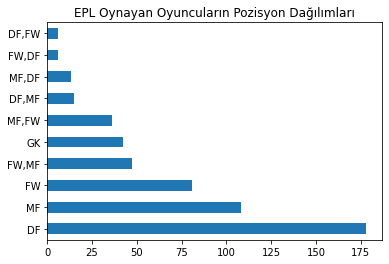

In [ ]:
# Pozisyon göre görsetleştirilmesi Pandas barplot ile çizilmesi
df['Position'].value_counts().plot.barh().set_title("EPL Oynayan Oyuncuların Pozisyon Dağılımları")

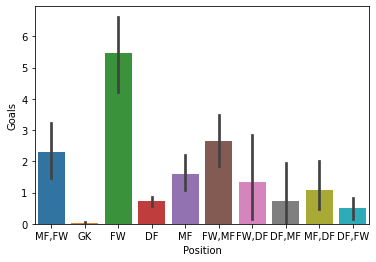

In [119]:
# Gol sayılarına göre Pozisypon dağılımın seaborn kütüphanesi ile görselleştirilmesi
sns.barplot(x='Position',y='Goals', data=df ) 

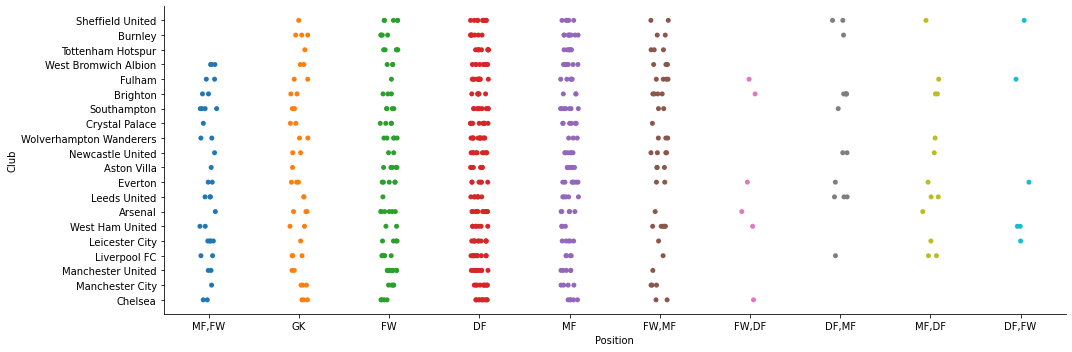

In [67]:
#İkili Dağılımın görselleştirilmesi clublerin oyuncu /hangi pozisyonda oynuyor 
sns.catplot(x='Position',y='Club', data=df,height=5, aspect=3)

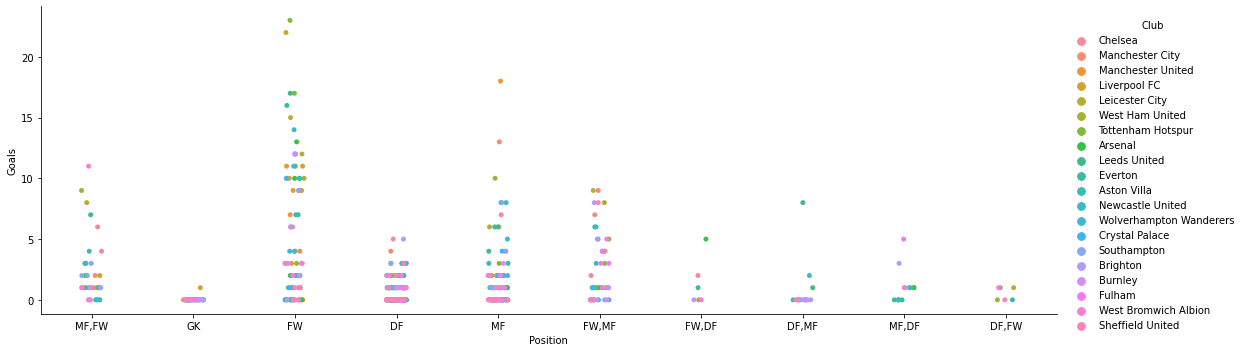

In [70]:
#club oyuncuların /hangi pozisyonda ortalama oynadıkları  / gol saysına göre ortalaması
#df.groupby(["Position","Club"])["Goals"].mean()
sns.catplot(x='Position',y='Goals',hue="Club",data=df,height=5, aspect=3)

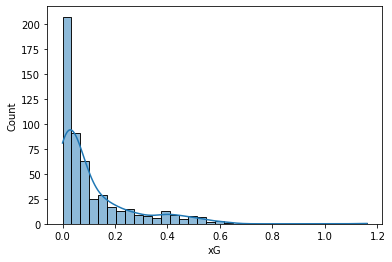

In [73]:
#tek değişkenli Xg gol beklentisi  histogram cizimi Gol beklenti sayıları / çarpık bir dağılım var.
sns.histplot(df.xG,kde=True,)

#Koleragrasyon(Saçılım)grafiği Örnekleri

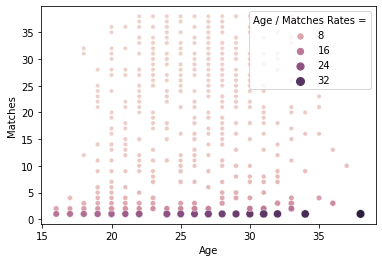

In [121]:
#3 değişkenli  sayısal değişken için yaşı ile oynadığı maç sayısı oranı  Kolerasyon ilişkisi inceleniyor. 
age_mat=df.eval('Age/Matches').rename('Age / Matches Rates =')#yaş değişkeni ile maç sayısı eşit ağırlıklara bölüyor
sns.scatterplot(x='Age',y='Matches',hue=age_mat ,size=age_mat,data=df)

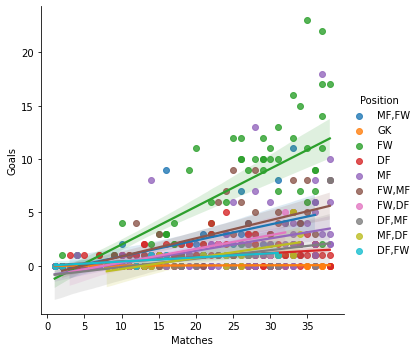

In [82]:
#Oyuncuların oynadıkları pozisyonlara göre maç sayıları ile gol bulma ilişkisi 
#Forwerd oyuncuların maç sayıları artıkca gol bulma oranları doğru orantılı artmış
sns.lmplot(x='Matches',y='Goals',hue='Position', data=df )

In [123]:
#or v in df['Name']:
  #  v='Harry Kane'
   # break
#sns.scatterplot(x='Matches',y='Goals',hue=v ,size=age_mat,data=df)

#Hipotez testi oluşturulması ve testleri

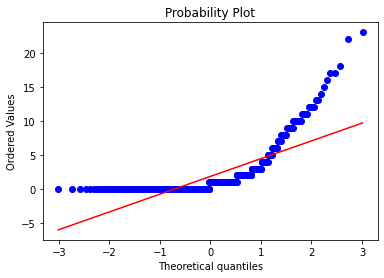

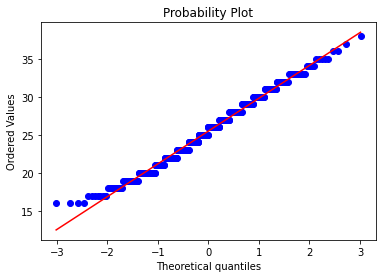

In [ ]:
#Goals değişkeni için Normal uygunluk kontrol ediliyor, normal görünmüyor
stats.probplot(df.Goals, dist='norm',plot=pylab )
pylab.show()
#Age değişkeni için Normal dağılıma uygun aranıyor, uygunluk görunuyor. alt kısımlarda uç noktalar şüphe uyandırdığı için shapiro testi yapılması öngürülüyor
stats.probplot(df.Age, dist='norm',plot=pylab )
pylab.show()

In [ ]:
#shapiro testi
#H0 = Age değişkeni normal dağılma uygunmudur(yaş ortalamısı 25 beklenmektedir)
#H1 = Age değişkeni normal dağılıma uygun değildir.
from scipy.stats import shapiro
stat,p=shapiro(df.Age)#statistic ve pvalue değerleri colablda direk yazmıyor
print('test istatistiği = ', stat ,'p.value değeri = ', p)
#P value değeri p<0.05 küçük olduğu için red ediliyor (p<0.05 ise red edilir. ..p value değeri p>0.05 ise veri normal dağılır)

test istatistiği =  0.9883080720901489 p.value değeri =  0.00029534593340940773


In [ ]:
stats.ttest_1samp(shapiro(df.Age),popmean=25) #p=0.01<0.05 bu durumda Ho red edilir ,  lig yaş ortalaması 25 den farklıdır.

Ttest_1sampResult(statistic=-49.60603774065276, pvalue=0.0128317758511709)

In [ ]:
#normale uygun görünmediği için işaret testi uygulanacak
sign_test(shapiro(df.Age), 25)
#0.5>0.05 bu durumda h0 red edilemez ,yaş ortalaması 25 eşit görünüyor

(-1.0, 0.5)

#İkili örneklem T testi

In [ ]:
#2019 yılı gol beklentisi  ile 2020 yılı gol beklentisi eşitmidir
#h0:19/20(xG)=20/21(xG)
#h1:19/20(xG)/20/21(xG)
stat,p=shapiro(df.xG)
stat9,p9=shapiro(dfo.xG)
print('2020 sezon gol beklentisi : ' ,'İstastistik : ',stat,'P value : ', p)
print('2019 sezon gol beklentisi : ' ,'İstastistik : ',stat9,'P value : ', p9)
#iki değişkende p value değeri >0.05 den büyük olduğu normal dağılama uygundur 

2020 sezon gol beklentisi :  İstastistik :  0.7448803782463074 P value :  8.265093689598824e-28
2019 sezon gol beklentisi :  İstastistik :  0.9388089776039124 P value :  1.216631877437157e-14


In [ ]:
#varyans homejeni kontrolu levene testi
#h0: varyanslar eşit (varyans homojen)
#h1:varyanslar eşit değildir
#p=1.3>0.05 olduğundan dolayı ho red edilemez varyanlar eşittir.
stats.levene(df.xG,dfo.xG)

LeveneResult(statistic=506.0814937326203, pvalue=1.3876296622092675e-92)

In [ ]:
#t testi uygunluk kontrolu
stats.ttest_ind(df.xG,dfo.xG, equal_var=True)
##p=6.3>0.05 olduğundan dolayı h0 red edilemez.her iki sezon gol bulma ortalaması birb .

Ttest_indResult(statistic=-35.09131308019798, pvalue=6.396878577909208e-182)

In [ ]:
#NON paramatrik karşılı
stats.mannwhitneyu(df.xG,dfo.xG)
##p=1.4>0.05 olduğundan dolayı h0 red edilemez

MannwhitneyuResult(statistic=4831.0, pvalue=1.4208539455571237e-171)